In [200]:
import numpy
import pandas as pd
import csv
from sklearn import preprocessing
numpy.random.seed(10)

In [201]:
all_df = pd.read_excel("data/titanic3.xls")

In [202]:
cols=['survived','name','pclass' ,'sex', 'age',
       'fare',]
all_df=all_df[cols]

In [203]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [204]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [205]:
all_df[355:359]

,survived,name,pclass,sex,age,fare
355,1,"Buss, Miss. Kate",2,female,36.0,13.0
356,0,"Butler, Mr. Reginald Fenton",2,male,25.0,13.0
357,0,"Byles, Rev. Thomas Roussel Davids",2,male,42.0,13.0
358,1,"Bystrom, Mrs. (Karolina)",2,female,42.0,13.0


In [206]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    

    ndarray = df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [207]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [208]:
train_Features[355:359]

array([[0.5       , 0.        , 0.32049799, 0.12687155],
       [0.5       , 0.        , 0.64665896, 0.12687155],
       [0.5       , 0.        , 0.74178924, 0.03122992],
       [0.5       , 1.        , 0.32049799, 0.14346245]])

In [209]:
train_Label[:4]

array([1., 1., 0., 0.])

In [210]:
test_Features.shape

(275, 4)

In [211]:
test_Label.shape

(275,)

In [212]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [213]:
train_Features.shape

(1034, 4)

In [214]:
train_Features = train_Features.reshape(train_Features.shape[0], 2, 2, 1)

In [215]:
train_Features.shape

(1034, 2, 2, 1)

In [216]:
model = Sequential()

In [217]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(2,2,1), 
                 activation='relu'))

In [218]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [219]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [220]:
model.add(Dropout(0.25))

In [221]:
model.add(Flatten())

In [222]:
model.add(Dense(128, activation='tanh'))

In [223]:
model.add(Dropout(0.25))

In [224]:
model.add(Dense(1,activation='sigmoid'))

In [225]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 2, 2, 1000)        2000      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 1000)        1001000   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 1000)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 2, 2, 1000)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               512128    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
__________

In [226]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1034/1034 [==============================] - 6s 6ms/step - loss: 0.1868 - acc: 0.7340


In [227]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=120,verbose=1)

Train on 827 samples, validate on 207 samples
Epoch 1/10
827/827 [==============================] - 4s 4ms/step - loss: 0.1585 - acc: 0.7715 - val_loss: 0.1552 - val_acc: 0.7681
Epoch 2/10
827/827 [==============================] - 4s 5ms/step - loss: 0.1595 - acc: 0.7799 - val_loss: 0.1609 - val_acc: 0.7536
Epoch 3/10
827/827 [==============================] - 4s 5ms/step - loss: 0.1555 - acc: 0.7823 - val_loss: 0.1756 - val_acc: 0.7536
Epoch 4/10
827/827 [==============================] - 3s 4ms/step - loss: 0.1573 - acc: 0.7751 - val_loss: 0.1746 - val_acc: 0.7536
Epoch 5/10
827/827 [==============================] - 4s 4ms/step - loss: 0.1471 - acc: 0.7969 - val_loss: 0.1647 - val_acc: 0.7681
Epoch 6/10
827/827 [==============================] - 3s 4ms/step - loss: 0.1480 - acc: 0.7908 - val_loss: 0.1725 - val_acc: 0.7536
Epoch 7/10
827/827 [==============================] - 3s 4ms/step - loss: 0.1455 - acc: 0.8102 - val_loss: 0.1934 - val_acc: 0.7150
Epoch 8/10
827/827 [==========

In [228]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

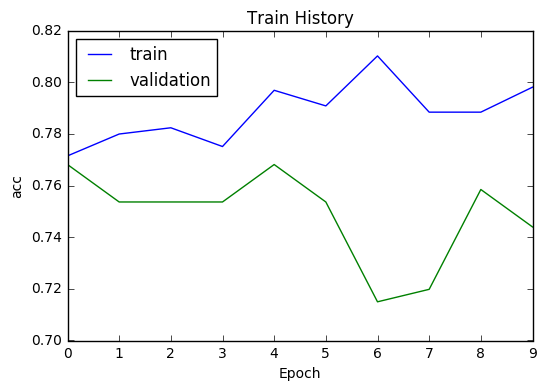

In [229]:
show_train_history(train_history,'acc','val_acc')

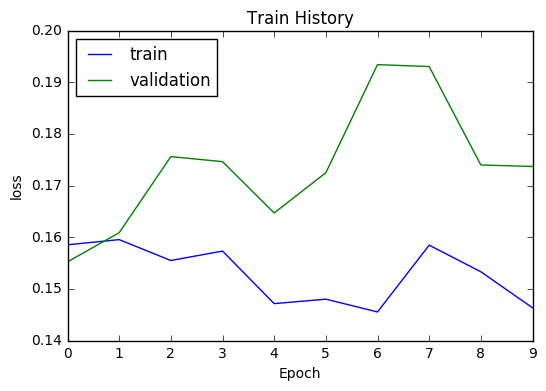

In [230]:
show_train_history(train_history,'loss','val_loss')

In [231]:
test_Features = test_Features.reshape(test_Features.shape[0], 2, 2, 1)

In [232]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 528us/step


In [233]:
scores[1]

0.7854545458880338